# Pandas 3
### Brynn
### Section 002
### 9/19/24

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [27]:
def prob1():
    """
    Use a groupby object to determine information about private
    and public universities.
    Specifically examine the columns 'S.F.Ratio', 'Top10perc',
    and 'Top25perc'.
    
    Return:
        ans_1 (ndarray): describe array of universities with 
                         higher S.F.Ratio
        ans_2 (ndarray): describe array of universities with
                         more students from Top10perc
        ans_3 (ndarray): describe array of universities with
                         more students from Top25perc
    """
    college = pd.read_csv('college.csv')
    grouped = college.groupby('Private')
    private, public = grouped.get_group('Yes'), grouped.get_group('No')


    # assign ans_1 to whichever has the greatest mean
    if private['S.F.Ratio'].describe().values[1] > public['S.F.Ratio'].describe().values[1]:
        ans_1 = private['S.F.Ratio'].describe().values
    else:
        ans_1 = public['S.F.Ratio'].describe().values

     # assign ans_2 to whichever has the greatest mean
    if private['Top10perc'].describe().values[1] > public['Top10perc'].describe().values[1]:
        ans_2 = private['Top10perc'].describe().values
    else:
        ans_2 = public['Top10perc'].describe().values

    # assign ans_3 to whichever has the greatest mean
    if private['Top25perc'].describe().values[1] > public['Top25perc'].describe().values[1]:
        ans_3 = private['Top25perc'].describe().values
    else:
        ans_3 = public['Top25perc'].describe().values

    return (ans_1, ans_2, ans_3)

prob1()

(array([212.        ,  17.13915094,   3.41804873,   6.7       ,
         15.1       ,  17.25      ,  19.325     ,  28.8       ]),
 array([565.        ,  29.33097345,  17.85139147,   1.        ,
         17.        ,  25.        ,  36.        ,  96.        ]),
 array([565.        ,  56.95752212,  19.58836048,   9.        ,
         42.        ,  55.        ,  70.        , 100.        ]))

# Problem 2

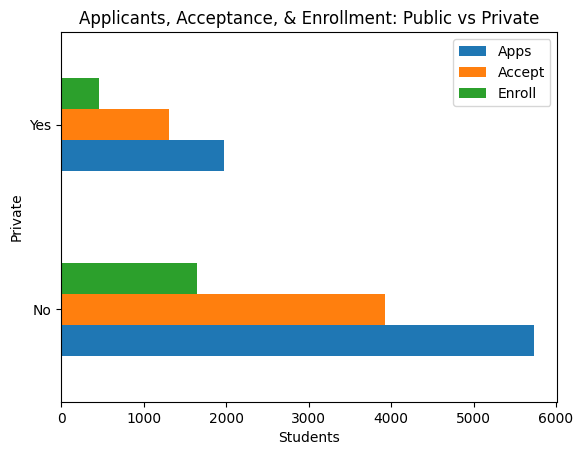

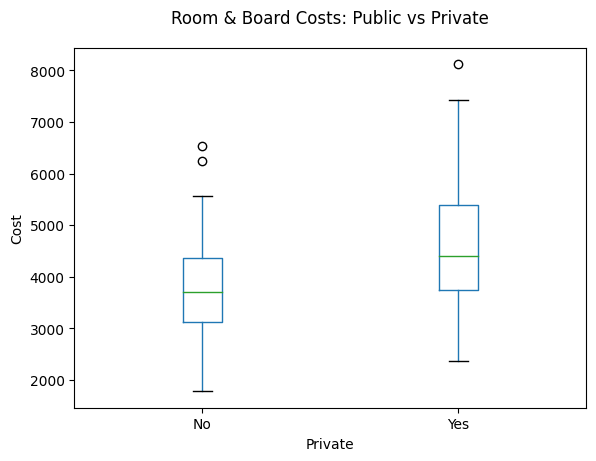

In [38]:
def prob2():
    """
    Use groupby visualizations to compare the following
    in private and public universities:
        1. Number of applicants, accept applicants, and
           enrolled applicants
        2. Range of price for room and board
    """
    college = pd.read_csv('college.csv')
    grouped = college.groupby('Private')

    #   How do the number of applicants, number of accepted students, and number 
    #   of enrolled students compare between private and public universities?
    grouped[['Apps', 'Accept', 'Enroll']].mean().plot(kind='barh')
    plt.xlabel('Students')
    plt.title('Applicants, Acceptance, & Enrollment: Public vs Private')

    #   How does the range of money spent on room and board 
    #   compare between private and public universities?
    college.boxplot(["Room.Board"], by="Private", grid=False)
    plt.ylabel('Cost')
    plt.suptitle('Room & Board Costs: Public vs Private')
    plt.title('')

prob2()

# Problem 3

In [54]:
def prob3():
    """
    Use Ohio_1999.csv and pivot tables to answer the
    following questions
        1. Which race/sex combination has the highest Usual Weekly 
            Earnings in total?
        2. Which race/sex combination worked the least amount of 
            cumulative hours?
        3. What race/sex combination worked the most hours per week 
            per person?
    Note: Hard coding is okay as long as there is code that makes sense for each problem.
    
    Returns:
        ans_1 (tuple): tuple with race and sex code, respectively
        ans_2 (tuple): tuple with race and sex code, respectively
        ans_3 (tuple): tuple with race and sex code, respectively
    """
    ohio = pd.read_csv('Ohio_1999.csv')
    # Which race/sex combination has the highest Usual Weekly Earnings in total?
    pivot1 = ohio.pivot_table(values='Usual Weekly Earnings', index=['Race', 'Sex'], aggfunc='max')
    ans_1 = pivot1.idxmax()[0]

    # Which race/sex combination has the lowest cumulative Usual Hours Worked?
    pivot2 = ohio.pivot_table(values='Usual Hours Worked', index=['Race', 'Sex'], aggfunc='sum')
    ans_2 = pivot2.idxmin()[0]

    # What race/sex combination has the highest average Usual Hours Worked?
    pivot3 = ohio.pivot_table(values='Usual Hours Worked', index=['Race', 'Sex'], aggfunc='mean')
    ans_3 = pivot3.idxmax()[0]

    return ans_1, ans_2, ans_3

print(prob3())
print('(White/male, Native American/Eskimo/female, Native American/Eskimo/male)')

((1, 1), (3, 2), (3, 1))
(White/male, Native American/Eskimo/female, Native American/Eskimo/male)


# Problem 4

In [59]:
def prob4():
    """
    Use Ohio_1999.csv to answer the following questions:
        1. What is the most common degree among workers?
        2. Which age group works the most hours on average?
        3. What age/degree combination has the smallest yearly
           salary on average?
    
    Return:
        ans_1 (Interval): degree interval
        ans_2 (Interval): age interval
        ans_3 (Interval, Interval): age interval and degree interval
    """
    ohio = pd.read_csv('Ohio_1999.csv')
    # find most common degree type
    ohio['Degree Type'] = pd.cut(ohio['Educational Attainment'], bins=[0, 38, 42, 46], labels=['No Degree', "High School/Associate's Degree", "Bachelor's Degree or Higher"])
    ans_1 = ohio.pivot_table(index='Degree Type', aggfunc="count").idxmax()[0] #(38, 42]

    # find interval w/ highest avg worked
    ages = pd.qcut(ohio['Age'], 6)
    pivot = ohio.pivot_table(index=ages, values = "Usual Hours Worked", aggfunc="mean")
    ans_2 = pivot.idxmax()[0]

    # find what age/degree combination has the lowest yearly salary on average
    pivot = ohio.pivot_table(values="Yearly Salary", index=[ages,'Degree Type'], aggfunc="mean")
    ans_3 = pivot.idxmin()[0]

    return ans_1, ans_2, ans_3

prob4()

("High School/Associate's Degree",
 Interval(40.0, 46.0, closed='right'),
 (Interval(15.999, 29.0, closed='right'), 'No Degree'))

# Problem 5

In [63]:
def prob5():
   """
    Use College.csv to answer the following questions:
        1. Is there a partition in which the number of both 
           private and public universities does not increase 
           as the percentage of alumni that donates increases?
        2. Is the partition with the greatest number of schools 
           the same for private and public universities?
        3. Is it true that the partition that has the least 
           number of students from the top 10 percent of their 
           high school class that were admitted on average is 
           the same for both private and public universities?
        4. The average percentage of students admitted from the 
           top 10 percent of their high school class is very high
           in private universities with very low acceptance rates. 
           Why is this not a good conclusion to draw solely from 
           this dataset? Use only the data to explain why; do not 
           extrapolate.

    Returns:
        ans_1 (bool): answer to question 1
        ans_2 (bool): answer to question 2
        ans_3 (bool): answer to question 3
        ans_4 (str): answer to question 4
   """
   college = pd.read_csv('college.csv')
   grouped = college.groupby('Private')
   private, public = grouped.get_group('Yes'), grouped.get_group('No')


   # part 1
   ans_1 = (college['perc.alumni'].corr(college['Expend']) > .5)

   # part 2
   scores = pd.cut(college['Grad.Rate'], 5)
   priv2 = private.pivot_table(index=scores, aggfunc="count")
   public2 = public.pivot_table(index=scores, aggfunc="count")
   ans_2 = priv2.idxmax()[0] == public2.idxmax()[0]

   # part 3
   ans_3 = (college['Top10perc'].corr(college['Accept']) > 0.5)

   group = college.groupby("Private")[["Accept", "Apps", "Top10perc"]].mean()

   ans_4 = 'The data set is limited, so it may contain bias'

   return ans_1, ans_2, ans_3, ans_4

prob5()

(False, False, False, 'The data set is limited, so it may contain bias')